In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ilinc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
categoryIndex = {
    'agriculture' :1,
    'cultural' : 2,
    'parenting' : 3,
    'sport' : 4,
    'travel' : 5
}

ro_df = pd.DataFrame(columns=['category','siteIdx', 'text'])

ro_df_agriculture = pd.read_csv('RO/agricultureRo.csv')
ro_df_agriculture['category'] = categoryIndex['agriculture']
ro_df = pd.concat([ro_df[['category', 'siteIdx', 'text']], ro_df_agriculture[['category', 'siteIdx', 'text']]], ignore_index=True)

ro_df_cultural = pd.read_csv('RO/culturalRo.csv')
ro_df_cultural['category'] = categoryIndex['cultural']
ro_df = pd.concat([ro_df[['category', 'siteIdx', 'text']], ro_df_cultural[['category', 'siteIdx', 'text']]], ignore_index=True)

ro_df_parenting = pd.read_csv('RO/parentingRo.csv')
ro_df_parenting['category'] = categoryIndex['parenting']
ro_df = pd.concat([ro_df[['category', 'siteIdx', 'text']], ro_df_parenting[['category', 'siteIdx', 'text']]], ignore_index=True)

ro_df_sport = pd.read_csv('RO/sportRo.csv')
ro_df_sport['category'] = categoryIndex['sport']
ro_df = pd.concat([ro_df[['category', 'siteIdx', 'text']], ro_df_sport[['category', 'siteIdx', 'text']]], ignore_index=True)

ro_df_travel = pd.read_csv('RO/travelRo.csv')
ro_df_travel['category'] = categoryIndex['travel']
ro_df = pd.concat([ro_df[['category', 'siteIdx', 'text']], ro_df_travel[['category', 'siteIdx', 'text']]], ignore_index=True)

ro_df.to_csv('RomanianTexts.csv', index=False)

md_df = pd.DataFrame(columns=['category','siteIdx', 'text'])

md_df_agriculture = pd.read_csv('MD/agricultureMd.csv')
md_df_agriculture['category'] = categoryIndex['agriculture']
md_df = pd.concat([md_df[['category', 'siteIdx', 'text']], md_df_agriculture[['category', 'siteIdx', 'text']]], ignore_index=True)

md_df_cultural = pd.read_csv('MD/culturalMd.csv')
md_df_cultural['category'] = categoryIndex['cultural']
md_df = pd.concat([md_df[['category', 'siteIdx', 'text']], md_df_cultural[['category', 'siteIdx', 'text']]], ignore_index=True)

md_df_parenting = pd.read_csv('MD/parentingMd.csv')
md_df_parenting['category'] = categoryIndex['parenting']
md_df = pd.concat([md_df[['category', 'siteIdx', 'text']], md_df_parenting[['category', 'siteIdx', 'text']]], ignore_index=True)

md_df_sport = pd.read_csv('MD/sportMd.csv')
md_df_sport['category'] = categoryIndex['sport']
md_df = pd.concat([md_df[['category', 'siteIdx', 'text']], md_df_sport[['category', 'siteIdx', 'text']]], ignore_index=True)

md_df_travel = pd.read_csv('MD/travelMd.csv')
md_df_travel['category'] = categoryIndex['travel']
md_df = pd.concat([md_df[['category', 'siteIdx', 'text']], md_df_travel[['category', 'siteIdx', 'text']]], ignore_index=True)
md_df.to_csv('MoldovanTexts.csv', index=False)

In [3]:
ro_df = pd.read_csv('RomanianTexts.csv')
md_df = pd.read_csv('MoldovanTexts.csv')

file_path = 'stopwords.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    stopwords = file.readlines()

stopwords = [word.strip() for word in stopwords]

def tokenize_text(text):
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalpha()]
    return ' '.join(filtered_words) 

ro_df['text'] = ro_df['text'].apply(lambda x: tokenize_text(x))
md_df['text'] = md_df['text'].apply(lambda x: tokenize_text(x))

In [4]:
import unicodedata

def normalize(word):
    nfkd_form = unicodedata.normalize('NFKD', word)
    return ''.join([c for c in nfkd_form if not unicodedata.combining(c)])

stopwords = list(set(normalize(word) for word in stopwords))


In [5]:
def tokenize_text(text):
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalpha()]
    filtered_words = list((normalize(word) for word in filtered_words))

    return ' '.join(filtered_words) 

ro_df['text'] = ro_df['text'].apply(lambda x: tokenize_text(x))
md_df['text'] = md_df['text'].apply(lambda x: tokenize_text(x))


def TF(doc, term):
    words = doc.split()
    return words.count(term) / len(words)

In [6]:
ro_tf = np.zeros((len(ro_df), len(stopwords)))
for i in range(len(ro_df)):
    for j in range(len(stopwords)):
        ro_tf[i, j] = TF(ro_df['text'].iloc[i], stopwords[j])

ro_tf_average = np.sum(ro_tf, axis = 0)/ro_tf.shape[0]
sorted_indices = np.argsort(ro_tf_average)[::-1]

print("Cuvintele în ordinea mediei frecventei:")
for idx in sorted_indices:
    print(f"Cuvant: {stopwords[idx]}, Media TF: {ro_tf_average[idx]}")

Cuvintele în ordinea mediei frecventei:
Cuvant: de, Media TF: 0.05269161795201541
Cuvant: si, Media TF: 0.03427816053298071
Cuvant: in, Media TF: 0.027870545186578506
Cuvant: sa, Media TF: 0.018204708367988886
Cuvant: la, Media TF: 0.0165156039191779
Cuvant: a, Media TF: 0.015325998854873424
Cuvant: cu, Media TF: 0.01432753768688714
Cuvant: ca, Media TF: 0.012873119496319307
Cuvant: o, Media TF: 0.012424507881342558
Cuvant: care, Media TF: 0.012080534987511571
Cuvant: mai, Media TF: 0.011789239844427233
Cuvant: pentru, Media TF: 0.011753586982902542
Cuvant: pe, Media TF: 0.01156914620840819
Cuvant: nu, Media TF: 0.010764110837073253
Cuvant: din, Media TF: 0.010395211452512775
Cuvant: este, Media TF: 0.009470468002399523
Cuvant: un, Media TF: 0.008842693439454374
Cuvant: se, Media TF: 0.007816447323876013
Cuvant: am, Media TF: 0.006429642525954354
Cuvant: ce, Media TF: 0.005704542472152992
Cuvant: sau, Media TF: 0.004824734446645723
Cuvant: sunt, Media TF: 0.004568796214797025
Cuvant: f

In [7]:
md_tf = np.zeros((len(md_df), len(stopwords)))
for i in range(len(md_df)):
    for j in range(len(stopwords)):
        md_tf[i, j] = TF(md_df['text'].iloc[i], stopwords[j])

md_tf_average = np.sum(md_tf, axis = 0)/md_tf.shape[0]
sorted_indices = np.argsort(md_tf_average)[::-1]

print("Cuvintele în ordinea mediei frecventei:")
for idx in sorted_indices:
    print(f"Cuvant: {stopwords[idx]}, Media TF: {md_tf_average[idx]}")

Cuvintele în ordinea mediei frecventei:
Cuvant: de, Media TF: 0.050518737941533644
Cuvant: si, Media TF: 0.03392935155223411
Cuvant: in, Media TF: 0.02756631877959184
Cuvant: a, Media TF: 0.01890648116247017
Cuvant: la, Media TF: 0.017949737733697554
Cuvant: sa, Media TF: 0.016507475194785327
Cuvant: cu, Media TF: 0.014540374410262716
Cuvant: din, Media TF: 0.011696998295961327
Cuvant: mai, Media TF: 0.011636134232111836
Cuvant: pentru, Media TF: 0.011548630360517433
Cuvant: ca, Media TF: 0.011476701277805756
Cuvant: o, Media TF: 0.010962791251678431
Cuvant: pe, Media TF: 0.010505648299442887
Cuvant: care, Media TF: 0.01029945009493466
Cuvant: nu, Media TF: 0.009311089630155858
Cuvant: un, Media TF: 0.007815488490752085
Cuvant: este, Media TF: 0.006689854748993398
Cuvant: se, Media TF: 0.0063752983602506546
Cuvant: am, Media TF: 0.006339669808172037
Cuvant: au, Media TF: 0.004610110221325886
Cuvant: fost, Media TF: 0.004422042177355028
Cuvant: ce, Media TF: 0.004403085107639187
Cuvant:

In [8]:
def IDF(term, corpus):
    nr_documents = len(corpus)
    doc_containing_term = sum(1 for doc in corpus if term in doc.split())
    doc_containing_term = doc_containing_term + 1
    return np.log(nr_documents/doc_containing_term)
    

In [9]:
ro_idf = np.zeros(len(stopwords))
for i in range(len(stopwords)):
    ro_idf[i] = IDF(stopwords[i],ro_df['text'])

ro_idf_sorted_indices = np.argsort(ro_idf)[::-1]

print("Cuvintele în ordinea IDF:")
for i in ro_idf_sorted_indices:
    print(f"Cuvant: {stopwords[i]},IDF:{ro_idf[i]}")

Cuvintele în ordinea IDF:
Cuvant: atitia,IDF:7.557994958530806
Cuvant: sintem,IDF:7.557994958530806
Cuvant: geaba,IDF:7.557994958530806
Cuvant: intrucit,IDF:7.557994958530806
Cuvant: citiva,IDF:7.557994958530806
Cuvant: dintr-,IDF:7.557994958530806
Cuvant: atitea,IDF:7.557994958530806
Cuvant: sinteti,IDF:7.557994958530806
Cuvant: oricind,IDF:7.557994958530806
Cuvant: sa-ti,IDF:7.557994958530806
Cuvant: citva,IDF:7.557994958530806
Cuvant: atita,IDF:7.557994958530806
Cuvant: sa-mi,IDF:7.557994958530806
Cuvant: printr-,IDF:7.557994958530806
Cuvant: curind,IDF:6.86484777797086
Cuvant: oricit,IDF:6.86484777797086
Cuvant: incit,IDF:6.86484777797086
Cuvant: miine,IDF:6.86484777797086
Cuvant: catva,IDF:6.459382669862696
Cuvant: atit,IDF:6.459382669862696
Cuvant: cita,IDF:6.459382669862696
Cuvant: citeva,IDF:6.459382669862696
Cuvant: halba,IDF:6.459382669862696
Cuvant: dintr,IDF:6.171700597410915
Cuvant: ului,IDF:6.171700597410915
Cuvant: nimeri,IDF:6.171700597410915
Cuvant: cit,IDF:5.948557046

In [10]:
md_idf = np.zeros(len(stopwords))
for i in range(len(stopwords)):
    md_idf[i] = IDF(stopwords[i],md_df['text'])

md_idf_sorted_indices = np.argsort(md_idf)[::-1]

print("Cuvintele în ordinea IDF:")
for i in md_idf_sorted_indices:
    print(f"Cuvant: {stopwords[i]},IDF:{md_idf[i]}")

Cuvintele în ordinea IDF:
Cuvant: ului,IDF:7.59337419312129
Cuvant: printr-,IDF:7.59337419312129
Cuvant: catva,IDF:7.59337419312129
Cuvant: dintr,IDF:7.59337419312129
Cuvant: sa-mi,IDF:7.59337419312129
Cuvant: citva,IDF:7.59337419312129
Cuvant: sa-ti,IDF:7.59337419312129
Cuvant: dintr-,IDF:7.59337419312129
Cuvant: atitia,IDF:6.900227012561346
Cuvant: intrucit,IDF:6.900227012561346
Cuvant: geaba,IDF:6.900227012561346
Cuvant: nimeri,IDF:6.900227012561346
Cuvant: ul,IDF:6.494761904453181
Cuvant: dinaintea,IDF:6.494761904453181
Cuvant: z,IDF:6.494761904453181
Cuvant: sinteti,IDF:6.494761904453181
Cuvant: oricit,IDF:6.494761904453181
Cuvant: halba,IDF:6.2070798320014005
Cuvant: oricind,IDF:6.2070798320014005
Cuvant: r,IDF:5.983936280687191
Cuvant: intr,IDF:5.983936280687191
Cuvant: cita,IDF:5.801614723893236
Cuvant: miine,IDF:5.801614723893236
Cuvant: j,IDF:5.801614723893236
Cuvant: curind,IDF:5.801614723893236
Cuvant: h,IDF:5.647464044065978
Cuvant: u,IDF:5.647464044065978
Cuvant: x,IDF:5.

In [11]:
ro_tf_idf = ro_tf * ro_idf[np.newaxis,:]
ro_tf_idf_average = np.mean(ro_tf_idf, axis=0)

sorted_indices = np.argsort(ro_tf_idf_average)[::-1]

print("Cuvintele în ordinea scorurilor DF-IDF:")
for idx in sorted_indices:
    print(f"Cuvant: {stopwords[idx]}, DF-IDF: {ro_tf_idf_average[idx]}")

Cuvintele în ordinea scorurilor DF-IDF:
Cuvant: am, DF-IDF: 0.0031548655528946075
Cuvant: e, DF-IDF: 0.0022818006653068015
Cuvant: ne, DF-IDF: 0.0017593383750417956
Cuvant: te, DF-IDF: 0.001711663243498117
Cuvant: ma, DF-IDF: 0.0016178009628996417
Cuvant: va, DF-IDF: 0.0015686683630554033
Cuvant: fost, DF-IDF: 0.0015043822600646051
Cuvant: lui, DF-IDF: 0.0014026467366473326
Cuvant: vor, DF-IDF: 0.0013934031371295255
Cuvant: iti, DF-IDF: 0.0013105615641519717
Cuvant: despre, DF-IDF: 0.0012946295586841049
Cuvant: asta, DF-IDF: 0.0012867850005439674
Cuvant: daca, DF-IDF: 0.0012437894452694432
Cuvant: eu, DF-IDF: 0.0012399989503877847
Cuvant: cand, DF-IDF: 0.0012231998083268704
Cuvant: noi, DF-IDF: 0.0011868714014501775
Cuvant: poate, DF-IDF: 0.0011700201401431468
Cuvant: asa, DF-IDF: 0.0011565709096942958
Cuvant: au, DF-IDF: 0.001153235065079686
Cuvant: foarte, DF-IDF: 0.0011457360194611003
Cuvant: ai, DF-IDF: 0.0011432640016873009
Cuvant: nu, DF-IDF: 0.0011428549475127258
Cuvant: le, DF-

In [12]:
md_tf_idf = md_tf * md_idf[np.newaxis,:]
md_tf_idf_average = np.mean(md_tf_idf, axis=0)

sorted_indices = np.argsort(md_tf_idf_average)[::-1]

print("Cuvintele în ordinea scorurilor DF-IDF:")
for idx in sorted_indices:
    print(f"Cuvant: {stopwords[idx]}, DF-IDF: {md_tf_idf_average[idx]}")

Cuvintele în ordinea scorurilor DF-IDF:
Cuvant: am, DF-IDF: 0.0036224731912373066
Cuvant: e, DF-IDF: 0.002664886365498661
Cuvant: nu, DF-IDF: 0.0020076132432742073
Cuvant: te, DF-IDF: 0.0019775553288873394
Cuvant: va, DF-IDF: 0.0019522673891306304
Cuvant: sau, DF-IDF: 0.001815374843618008
Cuvant: fost, DF-IDF: 0.0017974415136854309
Cuvant: vor, DF-IDF: 0.001790297664056024
Cuvant: cand, DF-IDF: 0.0017547323610993247
Cuvant: au, DF-IDF: 0.0017297011599993464
Cuvant: ne, DF-IDF: 0.0017118528486467438
Cuvant: al, DF-IDF: 0.0017099571268206796
Cuvant: sunt, DF-IDF: 0.0017036019549127768
Cuvant: ma, DF-IDF: 0.0016411024012612815
Cuvant: ce, DF-IDF: 0.0016391325079593293
Cuvant: ca, DF-IDF: 0.0016112354810123967
Cuvant: ai, DF-IDF: 0.0016101159250874802
Cuvant: dar, DF-IDF: 0.0015826284677866937
Cuvant: este, DF-IDF: 0.0015818559651547873
Cuvant: daca, DF-IDF: 0.0015628073811390353
Cuvant: noi, DF-IDF: 0.001542315172688327
Cuvant: le, DF-IDF: 0.0015395065542545673
Cuvant: despre, DF-IDF: 0.0

In [19]:
diff = ro_tf_idf_average - md_tf_idf_average
relative_diff = np.abs(diff) /(0.0000000000000000001 +  np.minimum(ro_tf_idf_average, md_tf_idf_average)) * 100
usage_comparison = np.where(diff > 0, "România", "Moldova")
sorted_indices = np.argsort(relative_diff)[::-1]
print("Cuvintele, diferențele relative între limbi și limba în care sunt mai folosite:")
for idx in sorted_indices:
    print(f"Cuvânt: {stopwords[idx]}, Diferență relativă: {relative_diff[idx]:.2f}%, Mai folosit în: {usage_comparison[idx]}")

sorted_stopwords = [stopwords[idx] for idx in sorted_indices]
sorted_relative_diff = [relative_diff[idx] for idx in sorted_indices]
sorted_usage_comparison = [usage_comparison[idx] for idx in sorted_indices]

Cuvintele, diferențele relative între limbi și limba în care sunt mai folosite:
Cuvânt: atita, Diferență relativă: 102639044200558320.00%, Mai folosit în: Moldova
Cuvânt: sintem, Diferență relativă: 63129932335695576.00%, Mai folosit în: Moldova
Cuvânt: atitea, Diferență relativă: 57916201154107816.00%, Mai folosit în: Moldova
Cuvânt: citiva, Diferență relativă: 43846561297186040.00%, Mai folosit în: Moldova
Cuvânt: catva, Diferență relativă: 19795174493115688.00%, Mai folosit în: România
Cuvânt: oricind, Diferență relativă: 16849387224257644.00%, Mai folosit în: Moldova
Cuvânt: sinteti, Diferență relativă: 12337325709721132.00%, Mai folosit în: Moldova
Cuvânt: geaba, Diferență relativă: 11986844458544854.00%, Mai folosit în: Moldova
Cuvânt: intrucit, Diferență relativă: 11665049976436268.00%, Mai folosit în: Moldova
Cuvânt: ului, Diferență relativă: 10560832918512828.00%, Mai folosit în: România
Cuvânt: atitia, Diferență relativă: 8121927320042073.00%, Mai folosit în: Moldova
Cuvânt: 

In [20]:
import unicodedata

def normalize(word):
    nfkd_form = unicodedata.normalize('NFKD', word)
    return ''.join([c for c in nfkd_form if not unicodedata.combining(c)])

stopwords = list(set(normalize(word) for word in stopwords))


Accuracy: 0.7003841229193342
Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.67      0.69       389
         1.0       0.69      0.73      0.71       392

    accuracy                           0.70       781
   macro avg       0.70      0.70      0.70       781
weighted avg       0.70      0.70      0.70       781



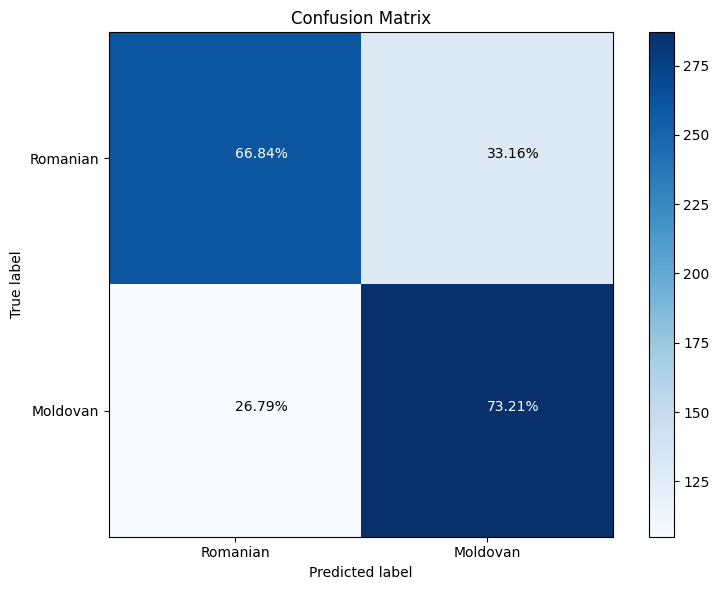

In [14]:
#train 80% test 20% of all data, regardless of category
texts = pd.concat([ro_df['text'], md_df['text']], ignore_index=True)
ro_labels = np.zeros(len(ro_df))
md_labels = np.ones(len(md_df))
labels = np.concatenate((ro_labels, md_labels))

vectorizer = TfidfVectorizer(vocabulary=stopwords)
X = vectorizer.fit_transform(texts)

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=10)
test_samples = X_test.shape[0]

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8, 6))
categories = ['Romanian', 'Moldovan']
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(categories))
plt.xticks(tick_marks, categories)
plt.yticks(tick_marks, categories)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, f'{cm_percentage[i, j]:.2f}%',
                color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


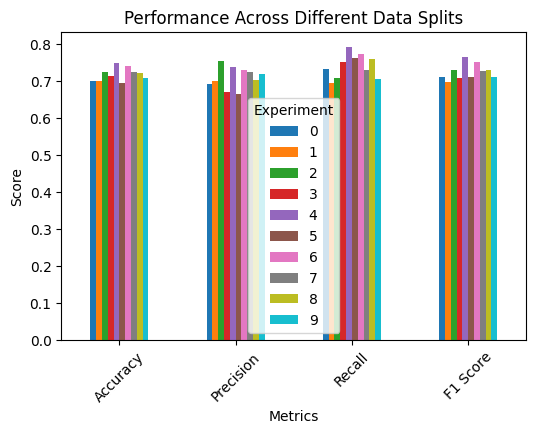

F1 scores:
[0.7103960396039604, 0.696103896103896, 0.7284105131414269, 0.708171206225681, 0.7637231503579951, 0.7101449275362319, 0.7506112469437654, 0.7263556116015134, 0.7295285359801489, 0.7112232030264817]


In [15]:
#performance across different data splits
metrics_dict = {
    'Experiment': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for experimentIdx in range(0,10):
    texts = pd.concat([ro_df['text'], md_df['text']], ignore_index=True)

    ro_labels = np.zeros(len(ro_df))
    md_labels = np.ones(len(md_df))
    labels = np.concatenate((ro_labels,md_labels))


    vectorizer = TfidfVectorizer(vocabulary=stopwords)
    X = vectorizer.fit_transform(texts)
    
    X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=10+experimentIdx)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    metrics_dict['Experiment'].append(experimentIdx)
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1 Score'].append(f1)

metrics_df = pd.DataFrame(metrics_dict)

metrics_df = metrics_df.set_index('Experiment').T

metrics_df.plot(kind='bar', figsize=(6, 4))
plt.title('Performance Across Different Data Splits')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.show()

print("F1 scores:")
print(metrics_dict['F1 Score'])

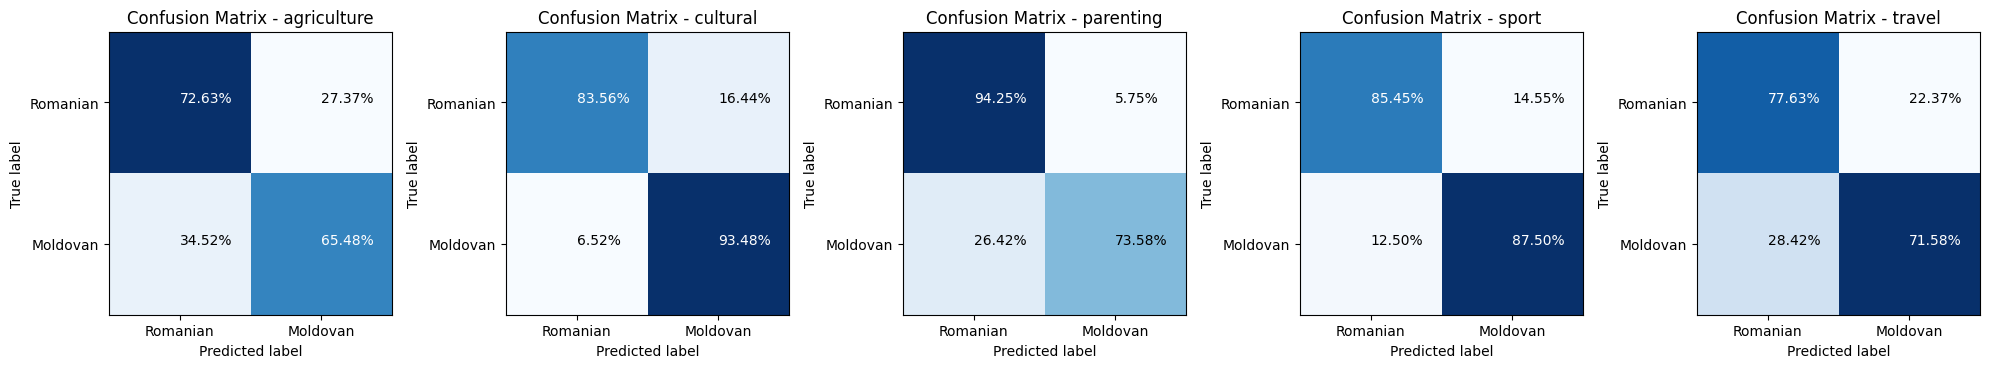

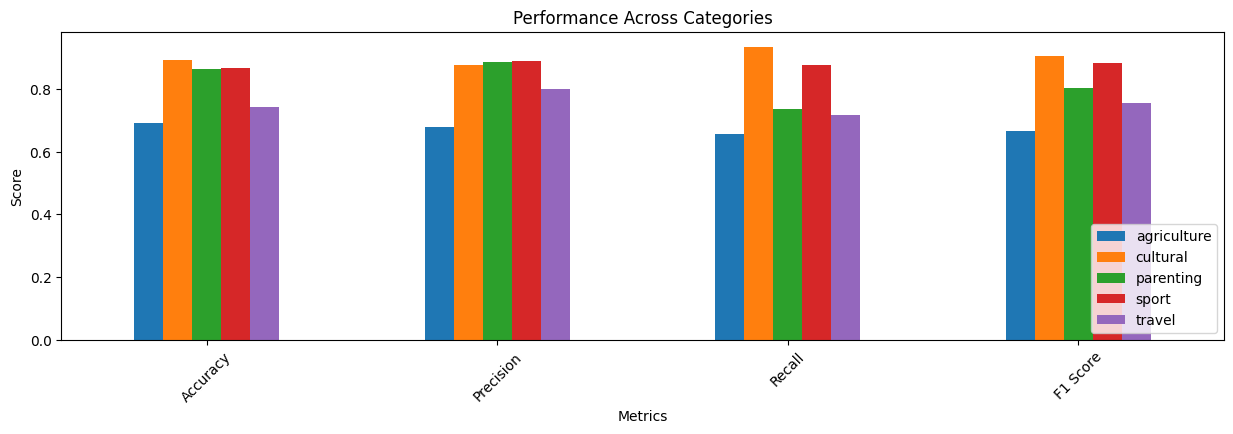

F1 scores:
[0.6666666666666667, 0.9052631578947369, 0.8041237113402062, 0.881118881118881, 0.7555555555555556]


In [16]:
# antrenez pe o categorie si testez pe aceiasi categorie
nr_of_categories = 5

metrics_dict = {
    'Category': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6)) 

for idx, (category, catIdx) in enumerate(categoryIndex.items()):
    c = idx  
    
    ro_category = ro_df[ro_df['category'] == catIdx]
    md_category = md_df[md_df['category'] == catIdx]

    texts = pd.concat([ro_category['text'], md_category['text']], ignore_index=True)
    
    ro_labels = np.zeros(len(ro_category))
    md_labels = np.ones(len(md_category))
    labels = np.concatenate((ro_labels, md_labels))

    vectorizer = TfidfVectorizer(vocabulary=stopwords)
    X = vectorizer.fit_transform(texts)
    
    X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=10)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    im = axes[c].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    axes[c].set_title(f'Confusion Matrix - {category}')
    tick_marks = np.arange(2) 
    axes[c].set_xticks(tick_marks)
    axes[c].set_yticks(tick_marks)
    axes[c].set_xticklabels(['Romanian', 'Moldovan'])
    axes[c].set_yticklabels(['Romanian', 'Moldovan'])
    
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            axes[c].text(j, i, f'{cm_percentage[i, j]:.2f}%',
                         color="white" if cm[i, j] > thresh else "black")
    

            
    axes[c].set_ylabel('True label')
    axes[c].set_xlabel('Predicted label')
    
    metrics_dict['Category'].append(category)
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1 Score'].append(f1)

plt.tight_layout()
plt.show()

metrics_df = pd.DataFrame(metrics_dict)
metrics_df = metrics_df.set_index('Category').T

metrics_df.plot(kind='bar', figsize=(15, 4))
plt.title('Performance Across Categories')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.legend(loc='lower right')

plt.show()

print("F1 scores:")
print(metrics_dict['F1 Score'])


C:\Users\ilinc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


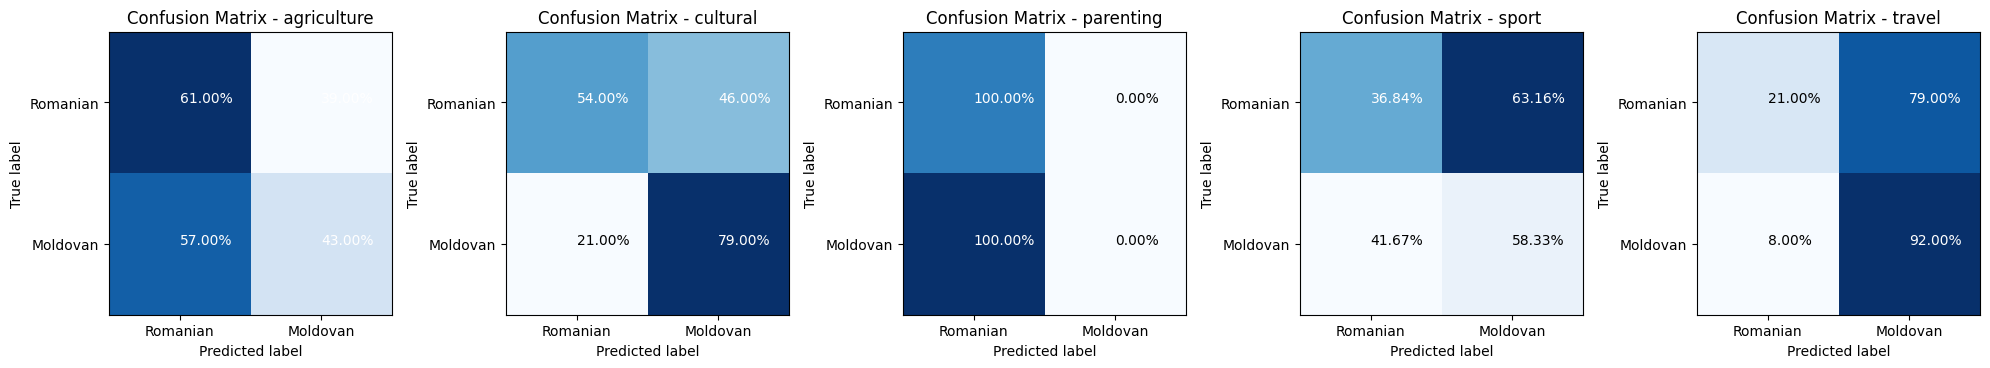

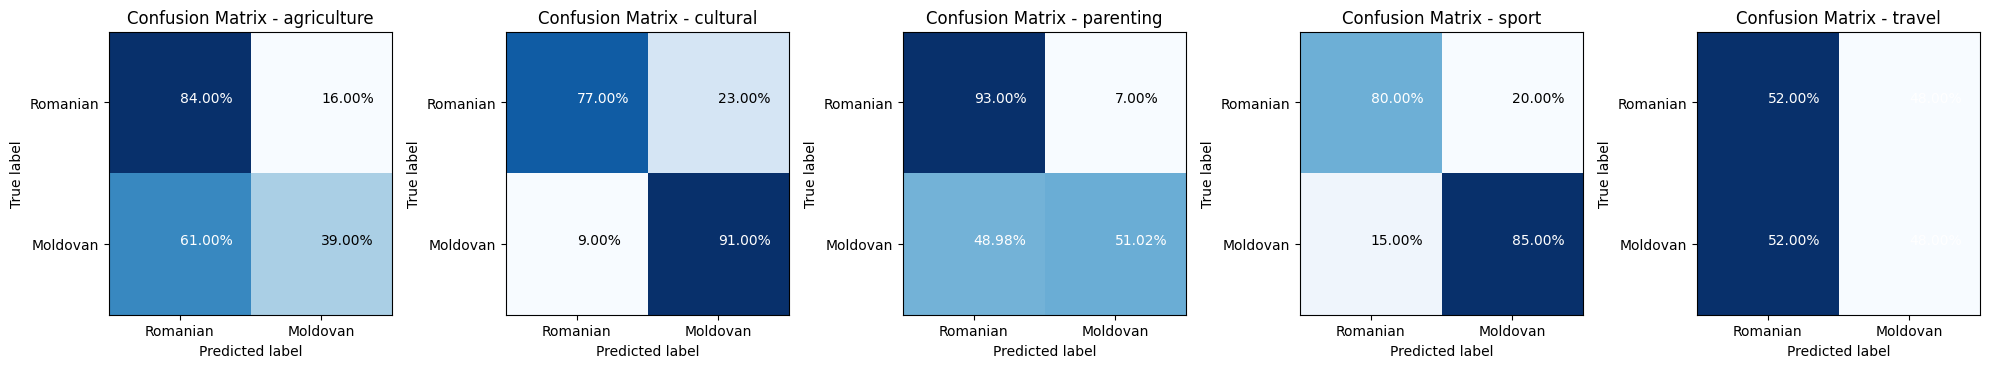

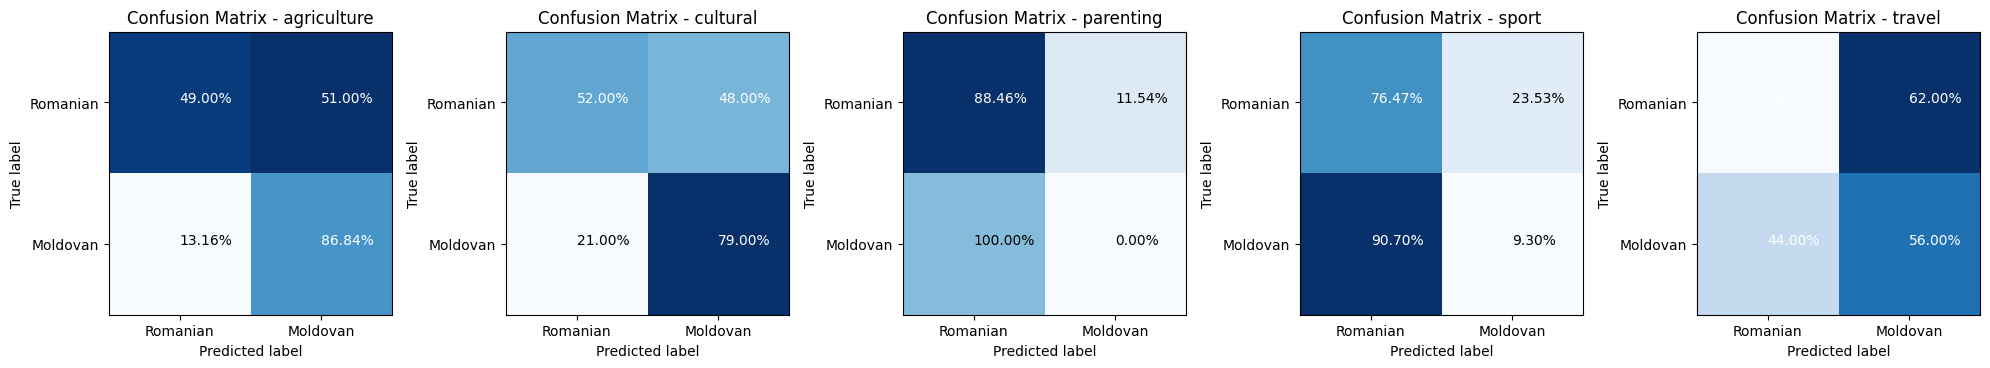

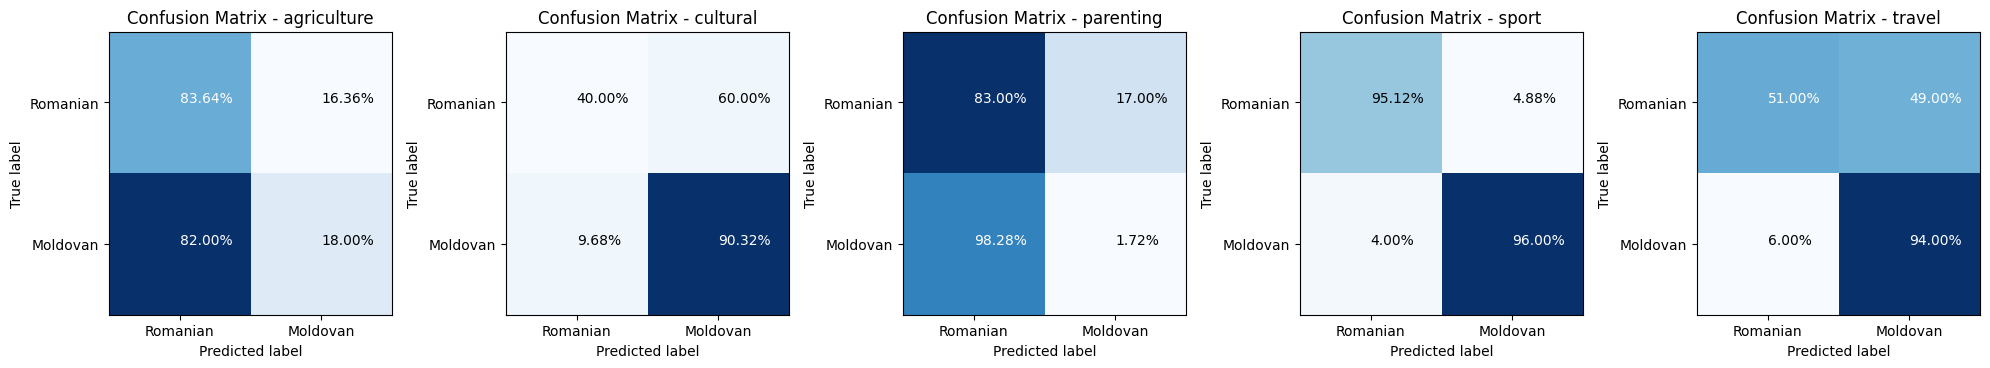

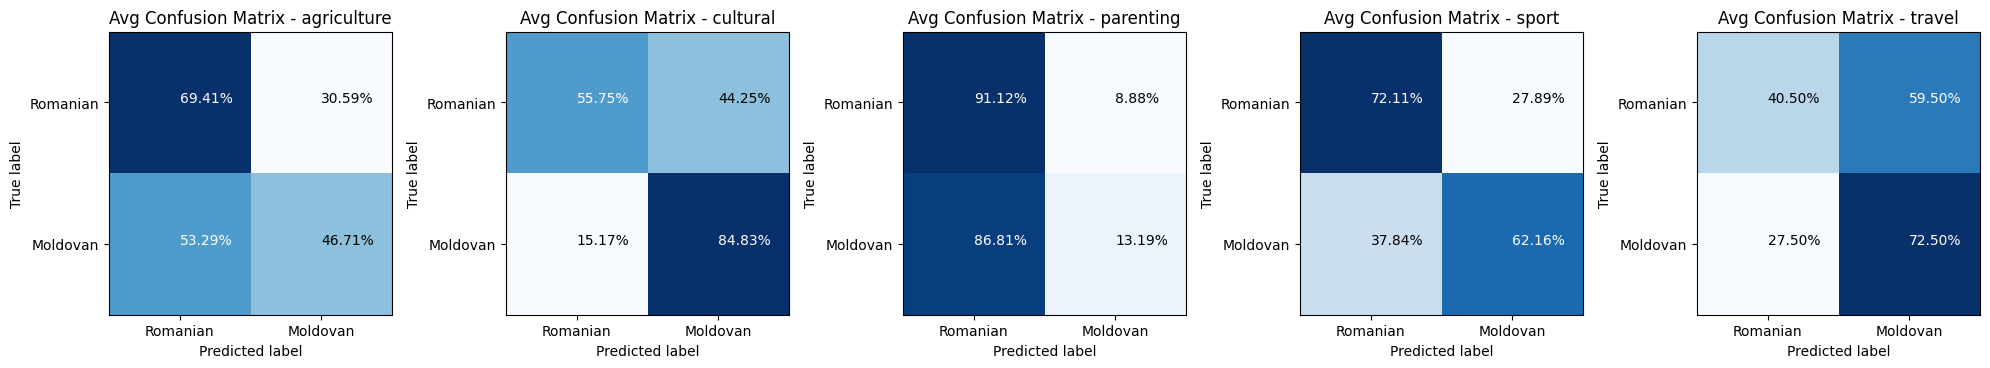

In [17]:
#antrenez pe 4 siteuri ale aceleiasi categorii si testez pe al 5 lea site
category_conf_matrices = {cat: np.zeros((2, 2)) for cat in categoryIndex.keys()}

for testedSiteIdx in range(1, 5):  
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6)) 

    for idx, (category, catIdx) in enumerate(categoryIndex.items()):
        c = idx  
        
        ro_train = ro_df[(ro_df['category'] == catIdx) & (ro_df['siteIdx'] != testedSiteIdx)]
        md_train = md_df[(md_df['category'] == catIdx) & (md_df['siteIdx'] != testedSiteIdx)]

        train_texts = pd.concat([ro_train['text'], md_train['text']], ignore_index=True)
        vectorizer = TfidfVectorizer(vocabulary=stopwords)
        X_train = vectorizer.fit_transform(train_texts)

        ro_labels_train = np.zeros(len(ro_train))
        md_labels_train = np.ones(len(md_train))
        y_train = np.concatenate((ro_labels_train, md_labels_train))

        ro_test = ro_df[(ro_df['category'] == catIdx) & (ro_df['siteIdx'] == testedSiteIdx)]
        md_test = md_df[(md_df['category'] == catIdx) & (md_df['siteIdx'] == testedSiteIdx)]

        test_texts = pd.concat([ro_test['text'], md_test['text']], ignore_index=True)
        X_test = vectorizer.transform(test_texts)

        ro_labels_test = np.zeros(len(ro_test))
        md_labels_test = np.ones(len(md_test))
        y_test = np.concatenate((ro_labels_test, md_labels_test))
            
        model = LogisticRegression()
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        cm = confusion_matrix(y_test, y_pred)
        cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

        category_conf_matrices[category] += cm_percentage

        im = axes[c].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        axes[c].set_title(f'Confusion Matrix - {category}')
        tick_marks = np.arange(2) 
        axes[c].set_xticks(tick_marks)
        axes[c].set_yticks(tick_marks)
        axes[c].set_xticklabels(['Romanian', 'Moldovan'])
        axes[c].set_yticklabels(['Romanian', 'Moldovan'])
        
        thresh = cm.max() / 2.
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                axes[c].text(j, i, f'{cm_percentage[i, j]:.2f}%',
                            color="white" if cm[i, j] > thresh else "black")
        
        axes[c].set_ylabel('True label')
        axes[c].set_xlabel('Predicted label')

    plt.tight_layout()
    plt.show()

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))
for idx, (category, catIdx) in enumerate(categoryIndex.items()):
    c = idx
    cm_avg = category_conf_matrices[category] / 4
    im = axes[c].imshow(cm_avg, interpolation='nearest', cmap=plt.cm.Blues)
    axes[c].set_title(f'Avg Confusion Matrix - {category}')
    tick_marks = np.arange(2)
    axes[c].set_xticks(tick_marks)
    axes[c].set_yticks(tick_marks)
    axes[c].set_xticklabels(['Romanian', 'Moldovan'])
    axes[c].set_yticklabels(['Romanian', 'Moldovan'])

    for i in range(cm_avg.shape[0]):
        for j in range(cm_avg.shape[1]):
            axes[c].text(j, i, f'{cm_avg[i, j]:.2f}%',
                        color="white" if cm_avg[i, j] > thresh else "black")

    axes[c].set_ylabel('True label')
    axes[c].set_xlabel('Predicted label')

plt.tight_layout()
plt.show()


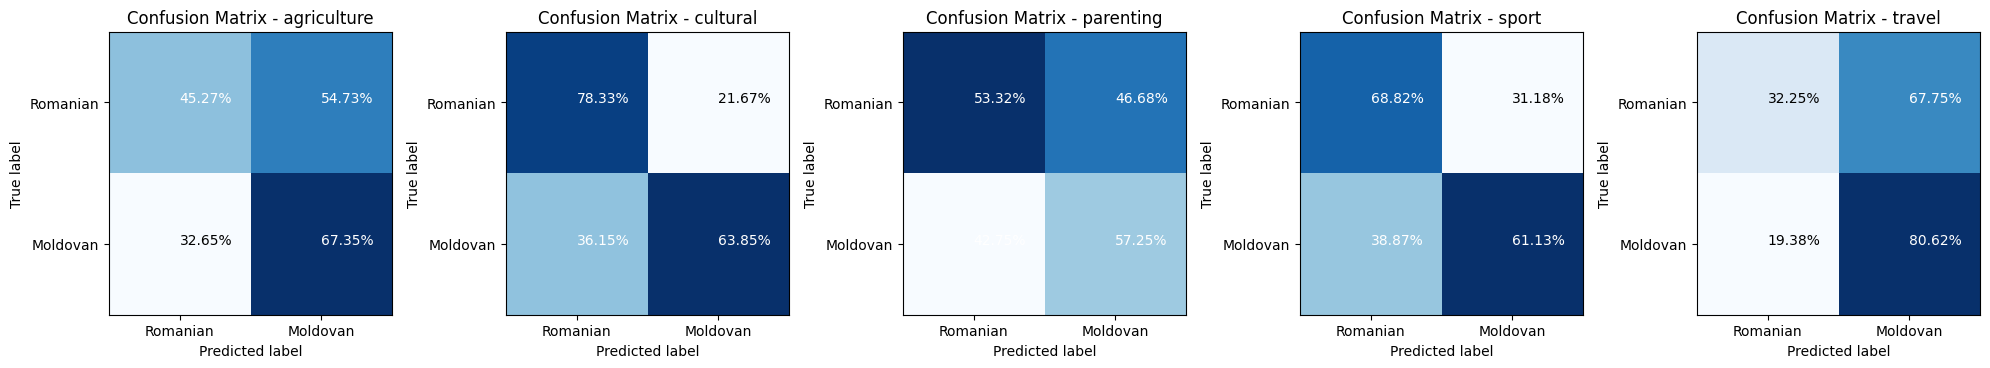

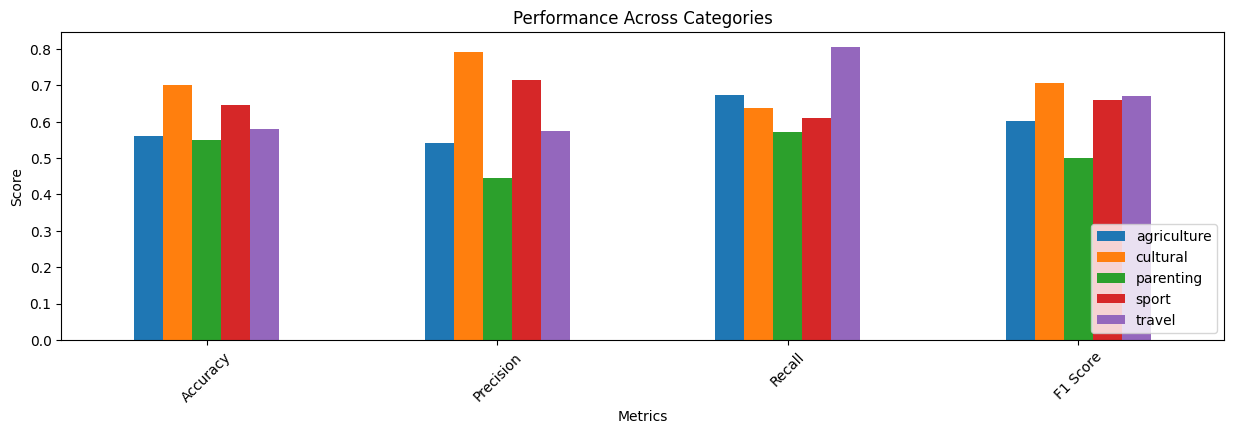

F1 scores:
[0.6008146639511202, 0.7065868263473053, 0.5007923930269413, 0.6585735963581184, 0.6709440879926672]


In [18]:
# antrenez pe 4 categorii si testez pe a 5 a
nr_of_categories = 5

metrics_dict = {
    'Category': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6)) 

for idx, (category, catIdx) in enumerate(categoryIndex.items()):
    c = idx  
    
    ro_train = ro_df[ro_df['category'] != catIdx]
    md_train = md_df[md_df['category'] != catIdx]

    train_texts = pd.concat([ro_train['text'], md_train['text']], ignore_index=True)
    vectorizer = TfidfVectorizer(vocabulary=stopwords)
    X_train = vectorizer.fit_transform(train_texts)

    ro_labels = np.zeros(len(ro_train))
    md_labels = np.ones(len(md_train))
    y_train = np.concatenate((ro_labels, md_labels))

    ro_test = ro_df[ro_df['category'] == catIdx]
    md_test = md_df[md_df['category'] == catIdx]

    test_texts = pd.concat([ro_test['text'], md_test['text']], ignore_index=True)
    vectorizer = TfidfVectorizer(vocabulary=stopwords)
    X_test = vectorizer.fit_transform(test_texts)

    ro_labels = np.zeros(len(ro_test))
    md_labels = np.ones(len(md_test))
    y_test = np.concatenate((ro_labels, md_labels))
        
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    im = axes[c].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    axes[c].set_title(f'Confusion Matrix - {category}')
    tick_marks = np.arange(2) 
    axes[c].set_xticks(tick_marks)
    axes[c].set_yticks(tick_marks)
    axes[c].set_xticklabels(['Romanian', 'Moldovan'])
    axes[c].set_yticklabels(['Romanian', 'Moldovan'])
    
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            axes[c].text(j, i, f'{cm_percentage[i, j]:.2f}%',
                         color="white" if cm[i, j] > thresh else "black")
    
    axes[c].set_ylabel('True label')
    axes[c].set_xlabel('Predicted label')
    
    metrics_dict['Category'].append(category)
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1 Score'].append(f1)

plt.tight_layout()
plt.show()

metrics_df = pd.DataFrame(metrics_dict)
metrics_df = metrics_df.set_index('Category').T

metrics_df.plot(kind='bar', figsize=(15, 4))
plt.title('Performance Across Categories')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.legend(loc='lower right')

plt.show()

print("F1 scores:")
print(metrics_dict['F1 Score'])
